#Purchase Case Study

**Compare Mean**:
1. t-test
2. z-test

**Compare Variance**:
1. Anova test
2. f-test

**Compare Ratio/Proportion/%**:
1. z_proportion test

**Problem Statement:**

1. Perform a Detailed EDA for the Data with inferences from each of the actions.

2. Using Statistical Analysis, find out statistical evidence for the following:

a. It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?

b. It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?

c. Are the variances of the purchase amounts significantly different between men and women in the age group 18-25?"

d. Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('purchase_data.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [4]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
data.shape

(263015, 12)

**Description of columns in dataset:**

User_ID:
This column represents the unique identifier for each user or customer who made the purchase.

Product_ID:
This column contains the unique identifier for each product that was purchased.

Gender:
This column indicates the gender of the user who made the purchase. It could have values such as "Male" or "Female."

Age:
This column represents the age group or category of the user who made the purchase. It can be categorized into different age ranges, such as "18-25," "26-35," "36-45," and so on.

Occupation:
This column denotes the occupation of the user who made the purchase. It may include numerical or categorical values representing different professions or job types.

City_Category:
This column categorizes the city or region from which the purchase was made. It typically includes labels like "A," "B," or "C" to represent different city categories or types.

Stay_In_Current_City_Years:
This column indicates the number of years the user has been living in their current city. It may have values such as "0" for less than a year, "1" for one year, "2" for two years, and so on.

Marital_Status:
This column represents the marital status of the user. It could be encoded as "0" for unmarried/single and "1" for married.

Product_Category_1:
This column refers to the primary category of the purchased product. It may contain numerical or categorical values representing different product categories.

Product_Category_2:
This column corresponds to the secondary category of the purchased product. It could also contain numerical or categorical values, but it is not necessarily present in all datasets.

Product_Category_3:
This column represents the tertiary category of the purchased product. Similar to the previous column, it may include numerical or categorical values and might not be present in all datasets.

Purchase:
This column contains the amount or value of the purchase made by the user. It represents the monetary value or quantity associated with the transaction.

In [8]:
# information of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


In [9]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [10]:
#changing 4+ to 4
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+', '4')

In [11]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0', nan], dtype=object)

In [13]:
data['Stay_In_Current_City_Years'] = pd.to_numeric(data['Stay_In_Current_City_Years'], errors='coerce' )

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  float64
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 24.1+ MB


**Checking and Handling null**

In [15]:
data.isnull().sum()
# data.isna().sum()  #same as above

User_ID                            0
Product_ID                         1
Gender                             1
Age                                1
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2             81514
Product_Category_3            182433
Purchase                           1
dtype: int64

In [16]:
data.isnull().sum().sum()

263956

In [17]:
#since dataset size is huge, drop the null values

data.dropna(inplace = True)
# data=data.dropna()

In [18]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [19]:
data.shape

(80582, 12)

**Label Encoding:** is a direct way to convert categorical column (object) into numeric type

Converting Age column

In [20]:
data['Age'].unique()

array(['0-17', '46-50', '26-35', '51-55', '36-45', '18-25', '55+'],
      dtype=object)

In [21]:
#library for encoding:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [22]:
data['Age'] = le.fit_transform(data['Age'])  #will encode age column

In [23]:
print(le.classes_)

['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']


In [24]:
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
label_map

{'0-17': 0,
 '18-25': 1,
 '26-35': 2,
 '36-45': 3,
 '46-50': 4,
 '51-55': 5,
 '55+': 6}

Convert Gender column

In [25]:
data['Gender'] = le.fit_transform(data['Gender'])  #will encode gender column

Zip: will combine the two values passed, here in key: value format since we are converting to dict

In [26]:
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
label_map

{'F': 0, 'M': 1}

In [28]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,0,0,10.0,A,2.0,0.0,1.0,6.0,14.0,15200.0
6,1000004,P00184942,1,4,7.0,B,2.0,1.0,1.0,8.0,17.0,19215.0
13,1000005,P00145042,1,2,20.0,A,1.0,1.0,1.0,2.0,5.0,15665.0
14,1000006,P00231342,0,5,9.0,A,1.0,0.0,5.0,8.0,14.0,5378.0
16,1000006,P0096642,0,5,9.0,A,1.0,0.0,2.0,3.0,4.0,13055.0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80582 entries, 1 to 263011
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80582 non-null  int64  
 1   Product_ID                  80582 non-null  object 
 2   Gender                      80582 non-null  int64  
 3   Age                         80582 non-null  int64  
 4   Occupation                  80582 non-null  float64
 5   City_Category               80582 non-null  object 
 6   Stay_In_Current_City_Years  80582 non-null  float64
 7   Marital_Status              80582 non-null  float64
 8   Product_Category_1          80582 non-null  float64
 9   Product_Category_2          80582 non-null  float64
 10  Product_Category_3          80582 non-null  float64
 11  Purchase                    80582 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 8.0+ MB


**Statistical Analysis of data**

In [31]:
data.describe()

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,8.058200e+04,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000
mean,1.002950e+06,0.776216,2.451540,8.173426,1.860775,0.401752,2.738366,6.892085,12.658298,11628.183279
std,1.706623e+03,0.416782,1.338429,6.487913,1.285501,0.490255,2.563225,4.498417,4.129156,5069.515441
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,1.001470e+06,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,9.000000,7868.000000
50%,1.002996e+06,1.000000,2.000000,7.000000,2.000000,0.000000,1.000000,6.000000,14.000000,11744.500000
75%,1.004326e+06,1.000000,3.000000,14.000000,3.000000,1.000000,4.000000,10.000000,16.000000,15610.000000
max,1.006040e+06,1.000000,6.000000,20.000000,4.000000,1.000000,15.000000,16.000000,18.000000,23958.000000


**Correlation check of data**

In [32]:
correlation = data.corr()
correlation

<ipython-input-32-521f87fcc686>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.031363,0.037296,-0.011989,-0.027286,0.015355,0.007063,0.007378,0.002135,0.000559
Gender,-0.031363,1.000000,-0.008751,0.110055,0.012817,-0.010459,-0.069258,-0.016422,0.033820,0.060034
Age,0.037296,-0.008751,1.000000,0.100146,-0.010013,0.311430,0.052910,0.047808,0.054444,0.023078
Occupation,-0.011989,0.110055,0.100146,1.000000,0.025064,0.031437,-0.013515,0.000714,0.013637,0.022187
Stay_In_Current_City_Years,-0.027286,0.012817,-0.010013,0.025064,1.000000,-0.015000,-0.006038,-0.000815,0.000347,0.003687
Marital_Status,0.015355,-0.010459,0.311430,0.031437,-0.015000,1.000000,0.016434,0.011027,0.016609,0.008585
Product_Category_1,0.007063,-0.069258,0.052910,-0.013515,-0.006038,0.016434,1.000000,0.496955,0.229194,-0.399093
Product_Category_2,0.007378,-0.016422,0.047808,0.000714,-0.000815,0.011027,0.496955,1.000000,0.545300,-0.152532
Product_Category_3,0.002135,0.033820,0.054444,0.013637,0.000347,0.016609,0.229194,0.545300,1.000000,-0.024676
Purchase,0.000559,0.060034,0.023078,0.022187,0.003687,0.008585,-0.399093,-0.152532,-0.024676,1.000000


<Axes: >

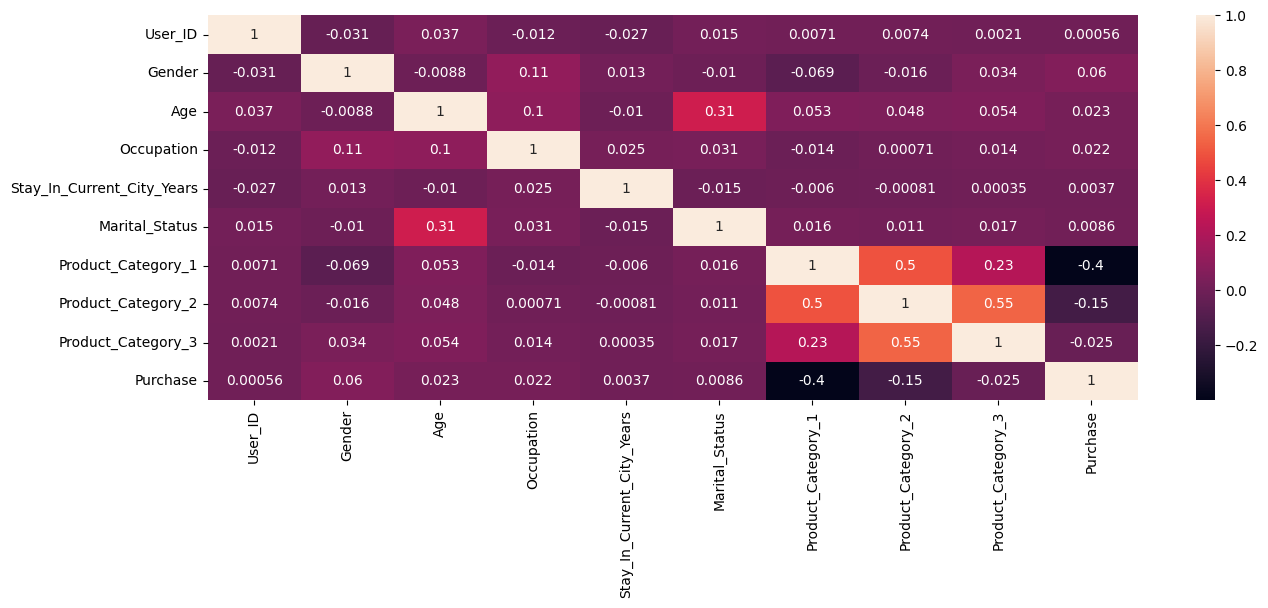

In [34]:
plt.figure(figsize=(15,5))
sns.heatmap(correlation, annot=True)

**Inferences:**  HW

Using Statistical Analysis, find out statistical evidence for the following:

a. It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?

b. It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?

c. Are the variances of the purchase amounts significantly different between men and women in the age group 18-25?"

d. Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?

**a. It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?**

In [35]:
# compare mean
# population: men of age 18-25
# pop_mean = 10000

# one sample test

# null hypo : the mean is 10000
# alternate : the mean is not 10000

In [36]:
new_data_1 = data.loc[(data['Age']==1) & data['Gender']==1]

In [37]:
new_data_1.shape

(11904, 12)

In [38]:
#one sample t test

sample_size = 25
sample_data_1 = new_data_1.sample(sample_size, random_state=0) #taking sample of size 25 from population

#random_state: to pick same sample (random rows from population) every time we run the code

In [39]:
sample_data_1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
124490,1001221,P00127942,1,1,0.0,B,1.0,0.0,1.0,2.0,5.0,7943.0
66720,1004217,P00002142,1,1,4.0,B,2.0,0.0,1.0,5.0,8.0,15811.0
194073,1005964,P00277642,1,1,5.0,B,1.0,0.0,2.0,3.0,10.0,12882.0
157342,1000302,P00173042,1,1,4.0,B,4.0,0.0,13.0,15.0,16.0,570.0
199012,1000742,P00270942,1,1,0.0,C,1.0,0.0,1.0,2.0,15.0,11519.0
177264,1003454,P00046742,1,1,0.0,A,1.0,1.0,1.0,2.0,15.0,15247.0
87575,1001498,P00130742,1,1,4.0,A,2.0,0.0,1.0,14.0,17.0,15719.0
134780,1002824,P00241642,1,1,4.0,C,3.0,0.0,1.0,2.0,11.0,15164.0
99107,1003378,P00216242,1,1,4.0,A,1.0,0.0,3.0,4.0,5.0,8282.0
236737,1000524,P00105142,1,1,0.0,A,0.0,0.0,1.0,2.0,15.0,11548.0


In [40]:
pop_mean = 10000

In [41]:
# t test one sample

from scipy.stats import ttest_1samp

ttest_stat, p_value = ttest_1samp(sample_data_1['Purchase'], pop_mean)

In [42]:
print(p_value)

0.40670035836140106


the p value is now compared to significance level (0.05)

since p value is greater than 0.05, we failed to reject the null hypo

**Conclusion**: The mean is 10000

**b. It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?**

In [44]:
# null hypo: percentage is 35%
# alt hypo: percentage is not 35%

# population: women that spend more that 10000

new_data_2 = data.loc[(data['Purchase']>10000) & (data['Gender']==0)]
new_data_2.shape

(10175, 12)

In [45]:
count = new_data_2.shape[0]
nobs = len(new_data_2['Gender'])

# since here it is one same z_prop, count, nobs will be same
#in case it is two sample, in count, size of one sample and in nobs, size of second sample

In [46]:
# z_prop test: count, nobs, value

from statsmodels.stats.proportion import proportions_ztest

z_stat , p_value = proportions_ztest(count= count , nobs= nobs , value=0.35)
print(p_value)

0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std


p value smaller than 0.05, so reject the null hypo

**Conclusion**: percentage is not 35%

c**. Are the variances of the purchase amounts significantly different between men and women in the age group 18-25?"**

In [48]:
# null hypo: variance is equal
# alt hypo: variance is not equal

data_men=  data.loc[(data['Gender']==1) & (data['Age']==1)] #one sample
data_women=  data.loc[(data['Gender']==0) & (data['Age']==1)] #second sample

In [49]:
#take sample sizes

data_men_sample = data_men.sample(500, random_state=0)
data_women_sample = data_women.sample(500, random_state=0)

In [50]:
#calculate varaince

print('variance of men sample: ', data_men_sample['Purchase'].var())
print('variance of women sample: ', data_women_sample['Purchase'].var())

variance of men sample:  25403579.498496994
variance of women sample:  26680870.93292184


In [51]:
# f test: to compare variance

from scipy.stats import f

F= data_men_sample['Purchase'].var()/data_women_sample['Purchase'].var()
print(F)

0.9521270712025828


In [52]:
sample_size_men= 500
sample_size_women= 500

In [53]:
# apply f test
import scipy
scipy.stats.f.cdf(F, sample_size_men-1, sample_size_women-1)

#sample_men-1:  degree of freedom: indicates the number of pieces of information available for estimation

0.2919761553947577

P value is greater than 0.05

**Conclude**: failed to reject the null hypo: variance is equal